# Jimmy Liang
## SJSU 001869817
## CMPE 258 - HW3 - Part B2
## PyTorch - With auto differentiation


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


## Helper Classes

In [62]:
# 3D plot function

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  from sklearn.manifold import TSNE

  tsne = TSNE(n_components=2, random_state=0)
  x_2d = tsne.fit_transform(x)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x_2d[:, 0], x_2d[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x_2d[:, 0], x_2d[:, 1], y_pred, label='our function')
  plt.legend()

In [63]:
# Linear class

class Linear(nn.Module):
  def __init__(self, input_dim: int, num_hidden):
    super(Linear, self).__init__()
    self.init = torch.rand(input_dim, num_hidden).float()
    self.weights = torch.nn.Parameter(self.init, requires_grad=True)
    self.bias = torch.zeros(num_hidden,)

  def __call__(self, x):
    self.x = x
    output = torch.mm(x, self.weights) + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = torch.mm(torch.transpose(self.x,0,1), gradient)
    self.bias_gradient = gradient.sum(0)
    self.x_gradient = torch.mm(gradient, torch.transpose(self.weights,0,1))
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient


In [64]:
class Model(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super(Model, self).__init__()
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = Linear(num_hidden, 2)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


In [65]:
# Fit function
from typing import Callable
def fit(x , y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 5 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    loss_value.backward()
    optimizer.step()

## Generating Test Data

x: torch.Size([100, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([100, 2])


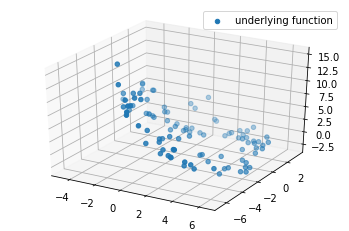

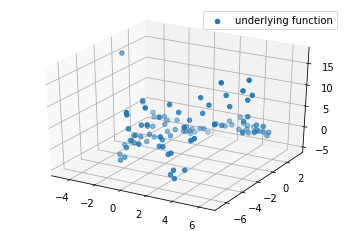

In [66]:
n = 100
d = 3
x = torch.FloatTensor(n, d).uniform_(-1, 1)
input_dim = d
output_dim = 2
learning_rate = 0.1 

weights_true = torch.tensor([[5, -1, 3], [1 , 8 , -3]]).float()
weights_true = torch.transpose(weights_true, 0, 1)
bias_true = torch.tensor([0.5, 1])
y_true = torch.mm(x**2, weights_true) + torch.mm(x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true[:,0])
plot_3d(x, y_true[:,1])

In [67]:
# Running the model for 1 step

loss = nn.MSELoss()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print('Loss Value: ', loss_value)
#plot_3d(x, y_true[:,0], y_pred[:,0])
#plot_3d(x, y_true[:,1], y_pred[:,1])

Loss Value:  tensor(17.9306, grad_fn=<MseLossBackward>)


Epoch 0, loss 17.930551528930664
Epoch 5, loss 11.327417373657227
Epoch 10, loss 4.374767303466797
Epoch 15, loss 1.758028268814087
Epoch 20, loss 1.2220993041992188
Epoch 25, loss 1.0021324157714844
Epoch 30, loss 0.850989818572998
Epoch 35, loss 0.7333828806877136


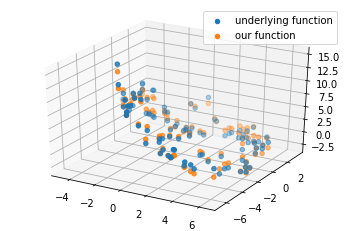

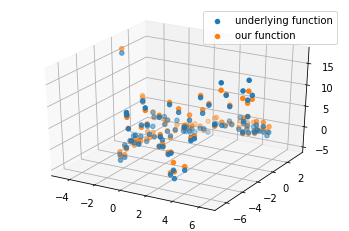

In [68]:
# Running the fit function, over 40 epochs

fit(x, y_true, model=model, loss=loss, lr=learning_rate, num_epochs=40)
y_pred = model(x)
y_pred = y_pred.detach().numpy()
plot_3d(x, y_true[:,0], y_pred[:,0])
plot_3d(x, y_true[:,1], y_pred[:,1])